In [7]:
import pandas as pd
%matplotlib inline

In [8]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [9]:
# df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')

In [10]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


# 1. Obtaining Datetime objects

<font color='red'>Question:</font> What is the type of **purchase_date**?

In [11]:
type(df.purchase_date[0])

str

In [12]:
# need to index !!!
type(df.purchase_date)

pandas.core.series.Series

In [13]:
# dtype is not specific enough
df['purchase_date'].dtype

dtype('O')

<font color='red'>Assignment:</font> Use **pandas.to_datetime** to **transform df.purchase_date** in to a series of datetime object and assign it to a variable **purchase_date**.

In [14]:
purchase_date = pd.to_datetime(df.purchase_date)
purchase_date

0      2008-12-19
1      1997-09-10
2      2001-09-05
3      2016-12-23
4      2000-01-12
          ...    
3192   2016-11-25
3193   2007-05-25
3194   2016-12-16
3195   2002-04-12
3196   2003-06-13
Name: purchase_date, Length: 3197, dtype: datetime64[ns]

<font color='red'>Assignment:</font> What is the earliest date in the datetime series.

In [15]:
sorted(purchase_date)[0]

Timestamp('1996-08-09 00:00:00')

In [16]:
purchase_date.nsmallest(1)

1361   1996-08-09
Name: purchase_date, dtype: datetime64[ns]

In [17]:
purchase_date.min()

Timestamp('1996-08-09 00:00:00')

<font color='red'>Assignment:</font> What is the latest date in the datetime series.

In [18]:
sorted(purchase_date, reverse = True)[0]

Timestamp('2017-10-06 00:00:00')

In [19]:
purchase_date.nlargest(1)

3134   2017-10-06
Name: purchase_date, dtype: datetime64[ns]

In [20]:
purchase_date.max()

Timestamp('2017-10-06 00:00:00')

# 2. Time series

**Example:** Generate time series of **price**.

In [21]:
price = df.price.map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))

https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff

In [22]:
price.head()

0    300492.0
1    430570.0
2    213070.0
3    229174.0
4    122659.0
Name: price, dtype: float64

In [23]:
price.index = purchase_date

In [24]:
price.head()

purchase_date
2008-12-19    300492.0
1997-09-10    430570.0
2001-09-05    213070.0
2016-12-23    229174.0
2000-01-12    122659.0
Name: price, dtype: float64

**Example**: Visualize the time series.

<AxesSubplot:xlabel='purchase_date'>

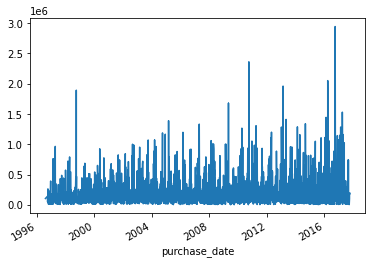

In [25]:
price.dropna().plot()

<font color='red'>Question:</font> Why do we need **dropna()** here?

In [26]:
price.isnull().sum()

11

### Becuase 'price' column has 11 NaN entries, which can not be plotted.

# 3. Time Series Aggregation

## 3.1 Resample

**Example**: Get montly counts of purchase events.

##### <font color='red'>Question:</font> why no dropna here?

<AxesSubplot:title={'center':'Monthly Counts'}, xlabel='purchase_date'>

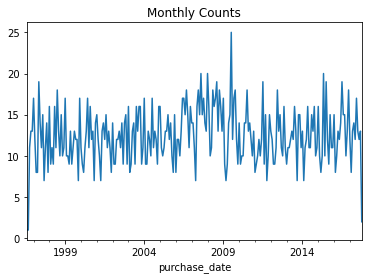

In [27]:
price.resample('M').count().plot(title='Monthly Counts')

In [28]:
price.sort_index()

purchase_date
1996-08-09    103343.0
1996-09-27    138381.0
1996-10-04     45701.0
1996-10-11    262119.0
1996-10-11    126383.0
                ...   
2017-10-04         NaN
2017-10-04         NaN
2017-10-04    174400.0
2017-10-06    192231.0
NaT                NaN
Name: price, Length: 3197, dtype: float64

In [29]:
# resample will sort by default
price.resample('D').count()

purchase_date
1996-08-09    1
1996-08-10    0
1996-08-11    0
1996-08-12    0
1996-08-13    0
             ..
2017-10-02    0
2017-10-03    0
2017-10-04    1
2017-10-05    0
2017-10-06    1
Name: price, Length: 7729, dtype: int64

<font color='red'>Assignment:</font> Get monthly price mean and median, respectively.

In [30]:
price.resample("M").mean()

purchase_date
1996-08-31    103343.000000
1996-09-30    138381.000000
1996-10-31    105156.818182
1996-11-30     76611.153846
1996-12-31     94739.615385
                  ...      
2017-06-30     93203.647059
2017-07-31    140474.307692
2017-08-31    217683.000000
2017-09-30    117562.153846
2017-10-31    183315.500000
Name: price, Length: 255, dtype: float64

<AxesSubplot:title={'center':'Montly Price Mean'}, xlabel='purchase_date'>

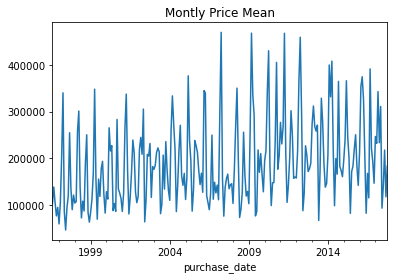

In [31]:
# price.resample('M').mean()
price.resample("M").mean().plot(title="Montly Price Mean")

<AxesSubplot:title={'center':'Montly Price Median'}, xlabel='purchase_date'>

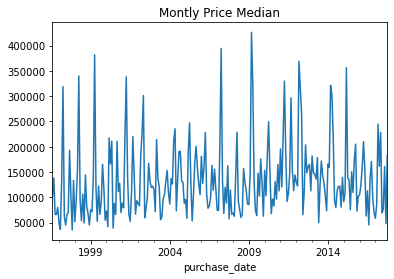

In [32]:
# price.resample('M').median()
price.resample("M").median().plot(title="Montly Price Median")

<font color='red'>Assignment:</font> Get bi-weekly price mean and median, respectively.

<AxesSubplot:title={'center':'Bi-weekly Price Mean'}, xlabel='purchase_date'>

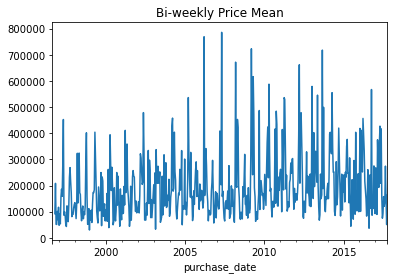

In [33]:
# price.resample('2W').mean()
price.resample("2W").mean().plot(title="Bi-weekly Price Mean")

<AxesSubplot:title={'center':'Bi-weekly Price Median'}, xlabel='purchase_date'>

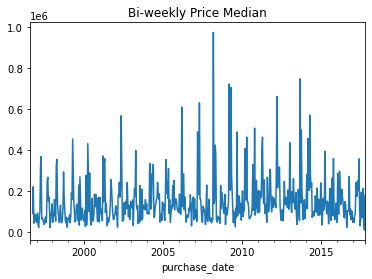

In [34]:
# price.resample('2W').median()
price.resample("2W").median().plot(title="Bi-weekly Price Median")

In [35]:
# bi-weekly is different from semi-month
price.resample('SM').mean()

purchase_date
1996-07-31    103343.000000
1996-08-15              NaN
1996-08-31              NaN
1996-09-15    138381.000000
1996-09-30    175711.000000
                  ...      
2017-07-31    138621.200000
2017-08-15    274155.714286
2017-08-31    148914.142857
2017-09-15     80984.833333
2017-09-30    183315.500000
Name: price, Length: 509, dtype: float64

In [36]:
# bi-weekly is different from semi-month
price.resample('14D').mean()

purchase_date
1996-08-09    103343.000000
1996-08-23              NaN
1996-09-06              NaN
1996-09-20    138381.000000
1996-10-04    175711.000000
                  ...      
2017-08-11    385915.750000
2017-08-25    138948.909091
2017-09-08     11656.000000
2017-09-22    127399.400000
2017-10-06    192231.000000
Name: price, Length: 553, dtype: float64

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

<font color='red'>Assignment:</font> Get monthly **profit** mean and median, respectively.

In [37]:
cost = df.cost.map(lambda x: x if type(x) == float else 1000*float(x.strip('$').strip('k')))

In [38]:
cost.index = purchase_date

In [39]:
profit = price - cost

In [40]:
profit.resample('M').mean()

purchase_date
1996-08-31             NaN
1996-09-30             NaN
1996-10-31   -95299.000000
1996-11-30    53287.000000
1996-12-31    66760.000000
                  ...     
2017-06-30    11728.363636
2017-07-31    10765.300000
2017-08-31    65528.444444
2017-09-30     7084.500000
2017-10-31   -75184.500000
Length: 255, dtype: float64

In [41]:
profit.resample('M').median()

purchase_date
1996-08-31        NaN
1996-09-30        NaN
1996-10-31   -95299.0
1996-11-30    53287.0
1996-12-31    66760.0
               ...   
2017-06-30   -23867.0
2017-07-31    17397.5
2017-08-31    82128.0
2017-09-30    -1756.5
2017-10-31   -75184.5
Length: 255, dtype: float64

##### <font color='red'>Question:</font> how about the missing? Should I fillna in price and cost before calculating the profit?

In [42]:
# fillna in price and cost, then calculate profit
profit_fillna = (price.fillna(price.mean()) - cost.fillna(cost.mean()))
profit_fillna.resample('M').median()

purchase_date
1996-08-31    -65889.851986
1996-09-30    -30851.851986
1996-10-31    -95299.000000
1996-11-30   -102613.851986
1996-12-31    -85506.851986
                  ...      
2017-06-30    -37413.000000
2017-07-31      8047.000000
2017-08-31     44631.148014
2017-09-30     -1756.500000
2017-10-31   -110682.363151
Length: 255, dtype: float64

In [43]:
price[(price.index>='1996-12')&(price.index<'1997-01')].sort_index()

purchase_date
1996-12-06     30358.0
1996-12-06     20648.0
1996-12-06    104481.0
1996-12-06     11583.0
1996-12-13     83726.0
1996-12-13    163218.0
1996-12-20     80039.0
1996-12-20     32051.0
1996-12-20    105676.0
1996-12-20     10321.0
1996-12-20    392466.0
1996-12-27     16612.0
1996-12-27    180436.0
Name: price, dtype: float64

In [44]:
cost[(cost.index>='1996-12')&(cost.index<'1997-01')].sort_index()

purchase_date
1996-12-06        NaN
1996-12-06        NaN
1996-12-06    26000.0
1996-12-06        NaN
1996-12-13        NaN
1996-12-13        NaN
1996-12-20    25000.0
1996-12-20        NaN
1996-12-20        NaN
1996-12-20        NaN
1996-12-20        NaN
1996-12-27        NaN
1996-12-27        NaN
Name: cost, dtype: float64

In [45]:
profit[(profit.index>='1996-12')&(profit.index<'1997-01')].sort_index()

purchase_date
1996-12-06        NaN
1996-12-06        NaN
1996-12-06    78481.0
1996-12-06        NaN
1996-12-13        NaN
1996-12-13        NaN
1996-12-20    55039.0
1996-12-20        NaN
1996-12-20        NaN
1996-12-20        NaN
1996-12-20        NaN
1996-12-27        NaN
1996-12-27        NaN
dtype: float64

In [46]:
# nan in cost is filled by a large value
profit_fillna[(profit_fillna.index>='1996-12')&(profit_fillna.index<'1997-01')].sort_index()

purchase_date
1996-12-06   -138874.851986
1996-12-06   -148584.851986
1996-12-06     78481.000000
1996-12-06   -157649.851986
1996-12-13    -85506.851986
1996-12-13     -6014.851986
1996-12-20     55039.000000
1996-12-20   -137181.851986
1996-12-20    -63556.851986
1996-12-20   -158911.851986
1996-12-20    223233.148014
1996-12-27   -152620.851986
1996-12-27     11203.148014
dtype: float64

##### You can fillna here, but needs to be more careful.

## 3.2 Rolling

\<font color='red'>Assignment:</font> Get seven-day rolling average of profit.

**what is rolling (moving) average?**
![image.png](attachment:image.png)

**two steps:**
1. list the profit of each day, ordered and aggregated (could have multiple sales in one day) - resample function
2. calculate rolling average - rolling function

In [47]:
# multiple sales single day - 2017-09-29
profit.sort_index().dropna()

purchase_date
1996-10-04    -95299.0
1996-11-01     21886.0
1996-11-29     84688.0
1996-12-06     78481.0
1996-12-20     55039.0
                ...   
2017-09-22     30775.0
2017-09-29    105934.0
2017-09-29    -15842.0
2017-10-04   -220600.0
2017-10-06     70231.0
Length: 2211, dtype: float64

In [48]:
# if no aggregation, will be multiple values for the same day - 2017-09-29
profit.sort_index().dropna().rolling('7D').mean()

purchase_date
1996-10-04    -95299.000000
1996-11-01     21886.000000
1996-11-29     84688.000000
1996-12-06     78481.000000
1996-12-20     55039.000000
                  ...      
2017-09-22     30775.000000
2017-09-29    105934.000000
2017-09-29     45046.000000
2017-10-04    -43502.666667
2017-10-06    -75184.500000
Length: 2211, dtype: float64

In [49]:
# must include every single day, resample, rather than groupby
profit.groupby(level=0).sum().rolling('7D').mean()

purchase_date
1996-08-09        0.0
1996-09-27        0.0
1996-10-04   -95299.0
1996-10-11        0.0
1996-10-25        0.0
               ...   
2017-09-15     -203.0
2017-09-22    30775.0
2017-09-29    90092.0
2017-10-04   -65254.0
2017-10-06   -75184.5
Length: 1278, dtype: float64

In [50]:
# the '-75184.5' is /2 not /7 of the last 7 days
profit.groupby(level=0).sum()

purchase_date
1996-08-09         0.0
1996-09-27         0.0
1996-10-04    -95299.0
1996-10-11         0.0
1996-10-25         0.0
                ...   
2017-09-15      -203.0
2017-09-22     30775.0
2017-09-29     90092.0
2017-10-04   -220600.0
2017-10-06     70231.0
Length: 1278, dtype: float64

In [51]:
# list the daily profit, ordered and aggregated (sum, not mean!!!)
profit.resample('D').sum()

purchase_date
1996-08-09         0.0
1996-08-10         0.0
1996-08-11         0.0
1996-08-12         0.0
1996-08-13         0.0
                ...   
2017-10-02         0.0
2017-10-03         0.0
2017-10-04   -220600.0
2017-10-05         0.0
2017-10-06     70231.0
Length: 7729, dtype: float64

In [52]:
price.aggregate('mean')

182317.63684871313

In [53]:
price.agg('mean')

182317.63684871313

In [54]:
price.mean()

182317.63684871313

In [55]:
# window = 7
profit.resample('D').sum().rolling(7).mean()

purchase_date
1996-08-09             NaN
1996-08-10             NaN
1996-08-11             NaN
1996-08-12             NaN
1996-08-13             NaN
                  ...     
2017-10-02    12870.285714
2017-10-03    12870.285714
2017-10-04   -18644.000000
2017-10-05   -18644.000000
2017-10-06   -21481.285714
Length: 7729, dtype: float64

In [56]:
# window = '7D'
profit.resample('D').sum().rolling('7D').mean()

purchase_date
1996-08-09        0.000000
1996-08-10        0.000000
1996-08-11        0.000000
1996-08-12        0.000000
1996-08-13        0.000000
                  ...     
2017-10-02    12870.285714
2017-10-03    12870.285714
2017-10-04   -18644.000000
2017-10-05   -18644.000000
2017-10-06   -21481.285714
Length: 7729, dtype: float64

##### <font color='red'>Question:</font> why rolling 7 and '7D' have different head rows?

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

**min_periods**

## 3.3 Cumulative

<font color='red'>Assignment:</font> Get cumulative sum of profit.

**Tips**
1. cumulative sum is not sum
2. don't forgot to resample first (otherwise duplicate records of the same day)

In [57]:
profit.resample('D').sum().cumsum()

purchase_date
1996-08-09            0.0
1996-08-10            0.0
1996-08-11            0.0
1996-08-12            0.0
1996-08-13            0.0
                 ...     
2017-10-02    110569758.0
2017-10-03    110569758.0
2017-10-04    110349158.0
2017-10-05    110349158.0
2017-10-06    110419389.0
Length: 7729, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum Profit'}, xlabel='purchase_date'>

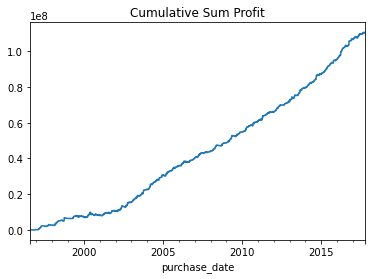

In [58]:
profit.resample("D").sum().cumsum().plot(title="Cumulative Sum Profit")

<AxesSubplot:title={'center':'Cumulative Sum Profit'}, xlabel='purchase_date'>

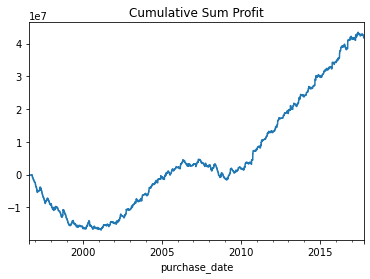

In [59]:
# profit with price and cost filled nan, cost over-estimated
profit_fillna.resample("D").sum().cumsum().plot(title="Cumulative Sum Profit")

##### This is the so-called 'business sense'

## 3.4 Time features

**Example:** Get weekday from the datetime series.

In [60]:
weekday = purchase_date.dt.weekday

In [61]:
weekday.head() # Monday=0, Sunday=6

0    4.0
1    2.0
2    2.0
3    4.0
4    2.0
Name: purchase_date, dtype: float64

**Example:** Get averaged price for each weekday.

In [62]:
df_tmp = pd.DataFrame({'price': price.values, 'weekday': weekday})

In [63]:
df_tmp.head()

,price,weekday
0,300492.0,4.0
1,430570.0,2.0
2,213070.0,2.0
3,229174.0,4.0
4,122659.0,2.0


<font color='red'>Question:</font> Why do we need **.values** for **price** here?

### It returns the Series as an array ???

In [64]:
# pd.DataFrame({'price': price, 'weekday': weekday})

In [65]:
weekday

0       4.0
1       2.0
2       2.0
3       4.0
4       2.0
       ... 
3192    4.0
3193    4.0
3194    4.0
3195    4.0
3196    4.0
Name: purchase_date, Length: 3197, dtype: float64

In [66]:
price

purchase_date
2008-12-19     300492.0
1997-09-10     430570.0
2001-09-05     213070.0
2016-12-23     229174.0
2000-01-12     122659.0
                ...    
2016-11-25      93349.0
2007-05-25      40384.0
2016-12-16    1074844.0
2002-04-12      55931.0
2003-06-13      44370.0
Name: price, Length: 3197, dtype: float64

In [67]:
price.index.duplicated().sum()

1918

In [68]:
price.sort_index()

purchase_date
1996-08-09    103343.0
1996-09-27    138381.0
1996-10-04     45701.0
1996-10-11    262119.0
1996-10-11    126383.0
                ...   
2017-10-04         NaN
2017-10-04         NaN
2017-10-04    174400.0
2017-10-06    192231.0
NaT                NaN
Name: price, Length: 3197, dtype: float64

In [69]:
# another sulotion
temp = weekday.copy() # can I do without .copy()? object v.s. reference (view)
temp.index = purchase_date
temp

purchase_date
2008-12-19    4.0
1997-09-10    2.0
2001-09-05    2.0
2016-12-23    4.0
2000-01-12    2.0
             ... 
2016-11-25    4.0
2007-05-25    4.0
2016-12-16    4.0
2002-04-12    4.0
2003-06-13    4.0
Name: purchase_date, Length: 3197, dtype: float64

https://www.dataquest.io/blog/settingwithcopywarning/

In [70]:
pd.DataFrame({'price': price, 'weekday': temp}).head()

,price,weekday
purchase_date,,
2008-12-19,300492.0,4.0
1997-09-10,430570.0,2.0
2001-09-05,213070.0,2.0
2016-12-23,229174.0,4.0
2000-01-12,122659.0,2.0


https://pandas.pydata.org/pandas-docs/dev/user_guide/duplicates.html

<AxesSubplot:xlabel='weekday'>

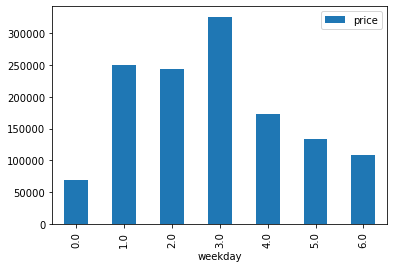

In [71]:
# very useful plot for time series data analysis
df_tmp.groupby('weekday').mean().plot(kind='bar')

<font color='red'>Assignment:</font> Get profit median for each month.

##### some of you didn't get the question

In [72]:
profit_month = pd.DataFrame({'profit': profit.values, 'month': purchase_date.dt.month})

In [73]:
profit_month.head()

,profit,month
0,-32508.0,12.0
1,NaN,9.0
2,-56930.0,9.0
3,NaN,12.0
4,25659.0,1.0


<AxesSubplot:xlabel='month'>

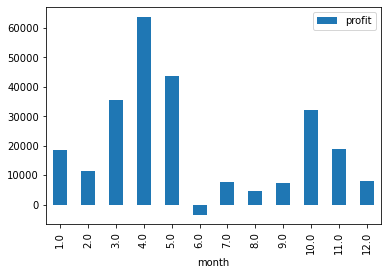

In [74]:
profit_month.groupby('month').median().plot(kind = 'bar')

* name a few time series data?

1. stock price
2. sensor